# Shortest Path with Caching and Fixed Routes
[module] -> [testing_performance]

In [2]:
from constructions.var import *
from constructions.stop import *
from constructions.path import *
from network.optimize import *
from shortestPath.fixedPoints import *
from shortestPath.a_star import *
from shortestPath.dijkstra import *
from network.contraction_hierarchies.CH import *
from performance.a_star_benchmark import *
from performance.contraction_hierarchies_fixed import *
from matplotlib import pyplot as plt
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import seaborn as sns
import time
import random


## Graph Optimization with Fixed_Routes and Caching

Graph's initialization

In [2]:
graph_fixed = Fixed_Caching("vars.json", "stops.json", "paths.json")

100%|██████████| 297/297 [00:02<00:00, 123.21it/s]


Load cache [important routes] successfully.
Load cache [fixed routes] successfully.


Save all cache before restart testing notebook

In [3]:
graph_fixed.save_all_cache()

Cache saving...
Cache saved successfully.


### Testing random stops with shortest path

Using A_Star_Cache + Fixed_Routes

In [4]:
all_stops = []
for stop in graph_fixed.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]
destination = all_stops[random.randint(0, len(all_stops) - 1)]
print(f"From {source} to {destination}.")
print(f"Zone of {source}: {graph_fixed.zoneAll[source]}.")
print(f"Zone of {destination}: {graph_fixed.zoneAll[destination]}.")
time1 = time.time()
totalTime, path = graph_fixed.shortest_path_fixed(source, destination)
time2 = time.time()
print("Path:", path)
print("Processing time:", time2 - time1)
graph_fixed.saveOneSP(totalTime, path, source, destination)

From 1377 to 349.
Zone of 1377: Quận 7.
Zone of 349: Quận Thủ Đức.
Two zones have no fixed route, no need caching [fixed routes].
Path: [1377, 1373, 1374, 1378, 1376, 1380, 1382, 1251, 4424, 1250, 1253, 1379, 27, 7265, 1256, 32, 31, 1092, 1093, 1094, 1095, 1096, 293, 295, 298, 297, 300, 299, 302, 301, 305, 304, 309, 306, 310, 312, 307, 308, 314, 316, 311, 313, 318, 2479, 347, 349]
Processing time: 0.008261680603027344
Find shortest path and save successfully.
GeoJSON file created successfully.


Using normal A_Star without Caching and Fixed_Routes

In [4]:
all_stops = []
for stop in graph_fixed.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]
destination = all_stops[random.randint(0, len(all_stops) - 1)]
print(f"From {source} to {destination}.")
print(f"Zone of {source}: {graph_fixed.zoneAll[source]}.")
print(f"Zone of {destination}: {graph_fixed.zoneAll[destination]}.")
time1 = time.time()
totalTime, path = graph_fixed.a_star_search(source, destination)
time2 = time.time()
print("Path:", path)
print("Processing time:", time2 - time1)
graph_fixed.saveOneSP(totalTime, path, source, destination)

From 2950 to 1055.
Zone of 2950: Quận 4.
Zone of 1055: Huyện Nhà Bè.
Path: [2950, 1252, 1254, 856, 855, 857, 858, 860, 859, 843, 2122, 2123, 2125, 2124, 2126, 2130, 2127, 2128, 2132, 2131, 2135, 2133, 2136, 2134, 1362, 1358, 1360, 1366, 1055]
Processing time: 0.002030611038208008
Find shortest path and save successfully.
GeoJSON file created successfully.


### Benchmark for testing performance

Using A_Star_Cache with Fixed_Routes

In [2]:
fixedBenchMark = A_Star_BenchMark("vars.json", "stops.json", "paths.json")

100%|██████████| 297/297 [00:02<00:00, 114.05it/s]


Load cache [important routes] successfully.
Load cache [fixed routes] successfully.


From stop 3750 to all stops.


100%|██████████| 4397/4397 [00:41<00:00, 105.00it/s]
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Fastest time: 0.000110626220703125
Slowest time: 0.03569459915161133
Average time: 0.00946417992457168


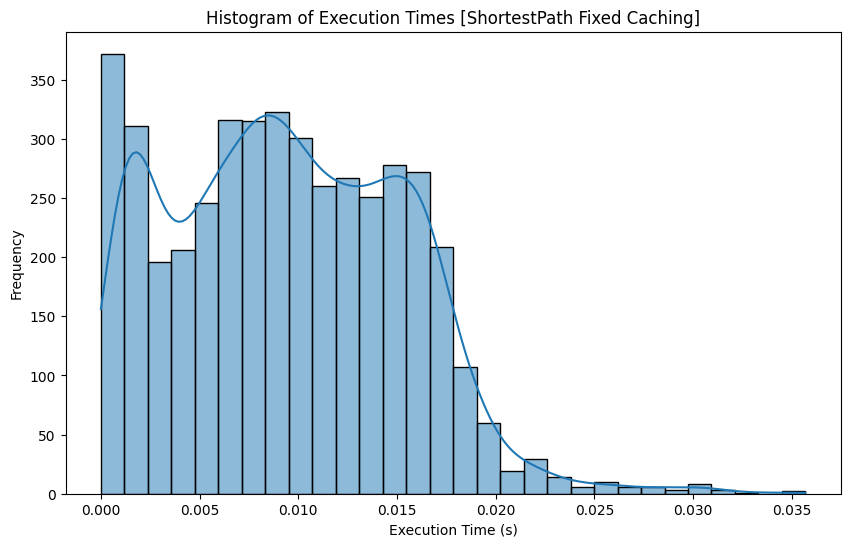

In [8]:
slowestTime = -1e9
fastestTime = 1e9
averageTime = 0

""" 
Generate a random source stop and calculate 
the shortest path to all other stops.

"""

timeExecution = []

all_stops = []
for stop in fixedBenchMark.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]

print(f"From stop {source} to all stops.")

for x in tqdm(fixedBenchMark.numVertices):
    startTime = time.time()
    totalTime, path = fixedBenchMark.shortest_path_fixed_benchmark(source, x)
    endTime = time.time()
    executionTime = endTime - startTime
    averageTime += executionTime
    
    timeExecution.append(executionTime)
    
    if executionTime > slowestTime:
        slowestTime = executionTime
    if executionTime < fastestTime and executionTime > 0:
        fastestTime = executionTime

averageTime = averageTime / len(fixedBenchMark.numVertices)
print("Fastest time:", fastestTime)
print("Slowest time:", slowestTime)
print("Average time:", averageTime)

plt.figure(figsize=(10, 6))
sns.histplot(timeExecution, bins=30, kde=True)
plt.title('Histogram of Execution Times [ShortestPath Fixed Caching]')
plt.xlabel('Execution Time (s)')
plt.ylabel('Frequency')
plt.show()


Using normal A_Star without Caching and Fixed_Routes

In [9]:
normalAStarBenchMark = A_Star("vars.json", "stops.json", "paths.json")

100%|██████████| 297/297 [00:02<00:00, 109.86it/s]


From stop 206 to all stops.


100%|██████████| 4397/4397 [00:42<00:00, 102.46it/s]

Fastest time: 0.0005030632019042969
Slowest time: 0.04304099082946777
Average time: 0.009690641787530943



c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


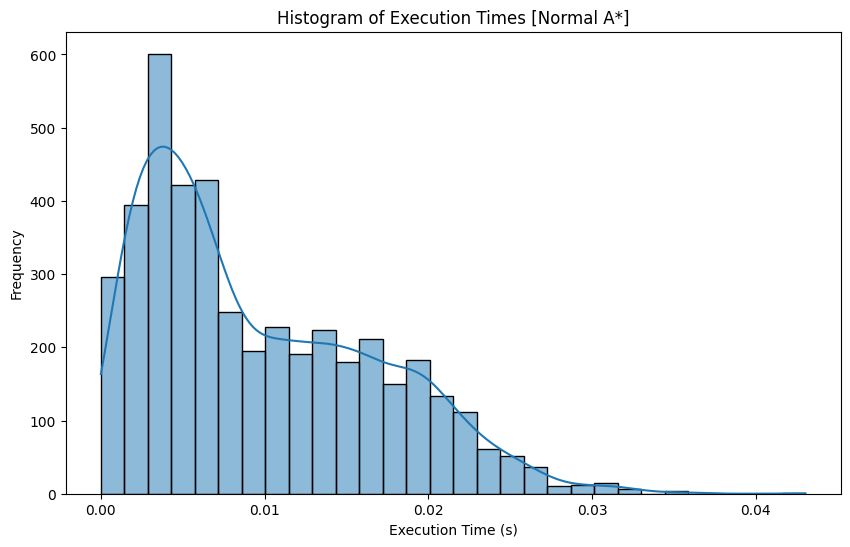

In [13]:
slowestTime = -1e9
fastestTime = 1e9
averageTime = 0

timeExecution = []

all_stops = []
for stop in normalAStarBenchMark.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]

print(f"From stop {source} to all stops.")

for x in tqdm(normalAStarBenchMark.numVertices):
    startTime = time.time()
    totalTime, path = normalAStarBenchMark.a_star_search(source, x)
    endTime = time.time()
    executionTime = endTime - startTime
    averageTime += executionTime
    
    timeExecution.append(executionTime)
    
    if executionTime > slowestTime:
        slowestTime = executionTime
    if executionTime < fastestTime and executionTime > 0:
        fastestTime = executionTime

averageTime = averageTime / len(normalAStarBenchMark.numVertices)

print("Fastest time:", fastestTime)
print("Slowest time:", slowestTime)
print("Average time:", averageTime)

plt.figure(figsize=(10, 6))
sns.histplot(timeExecution, bins=30, kde=True)
plt.title('Histogram of Execution Times [Normal A*]')
plt.xlabel('Execution Time (s)')
plt.ylabel('Frequency')
plt.show()

## Contraction Hierarchies Only

Graph's initialization

In [5]:
graph_ch = Contraction_Hierarchies("vars.json", "stops.json", "paths.json")

100%|██████████| 4397/4397 [00:03<00:00, 1147.52it/s]


Pre-processing stage

In [7]:
time1 = time.time()
graph_ch.pre_processing()
time2 = time.time()
print("Pre-processing time:", time2 - time1)

Preprocessing done!
Pre-processing time: 9.835362672805786


### Testing random stops with shortest path

In [15]:
all_stops = []
for stop in graph_ch.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]
destination = all_stops[random.randint(0, len(all_stops) - 1)]
print(f"From {source} to {destination}.")
print(f"Zone of {source}: {graph_ch.zoneAll[source]}.")
print(f"Zone of {destination}: {graph_ch.zoneAll[destination]}.")
time1 = time.time()
totalTime, path = graph_ch.query(source, destination)
time2 = time.time()
print("Path:", path)
print("Processing time:", time2 - time1)
graph_ch.saveOneSP(totalTime, path, source, destination)

From 1122 to 3169.
Zone of 1122: Huyện Nhà Bè.
Zone of 3169: Quận 5.
Path: [1122, 1123, 1125, 7306, 1126, 1129, 1130, 1127, 1128, 7593, 1131, 1132, 3629, 7073, 7076, 7074, 3626, 3631, 3627, 7069, 3630, 3632, 3633, 1244, 1246, 1245, 1247, 1249, 1251, 4424, 1250, 1253, 1379, 3080, 7274, 7275, 86, 89, 385, 387, 3182, 433, 434, 436, 435, 438, 8, 464, 470, 437, 439, 440, 1981, 3166, 3169]
Processing time: 0.003316640853881836
Find shortest path and save successfully.
GeoJSON file created successfully.


### Benchmark for testing performance CH Only

From stop 2142 to all stops.


100%|██████████| 4397/4397 [00:07<00:00, 600.92it/s]

Fastest time: 7.748603820800781e-05
Slowest time: 0.016424179077148438
Average time: 0.001652893815117585



c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


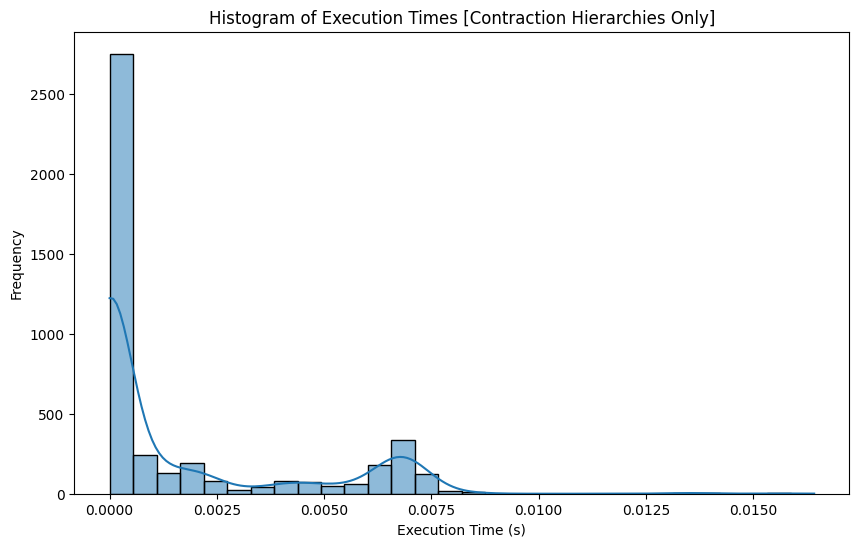

In [20]:
slowestTime = -1e9
fastestTime = 1e9
averageTime = 0

""" 
Generate a random source stop and calculate 
the shortest path to all other stops.

"""

timeExecution = []

all_stops = []
for stop in graph_ch.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]

print(f"From stop {source} to all stops.")

for x in tqdm(graph_ch.numVertices):
    startTime = time.time()
    totalTime, path = graph_ch.query(source, x)
    endTime = time.time()
    executionTime = endTime - startTime
    averageTime += executionTime
    
    timeExecution.append(executionTime)
    
    if executionTime > slowestTime:
        slowestTime = executionTime
    if executionTime < fastestTime and executionTime > 0:
        fastestTime = executionTime

averageTime = averageTime / len(graph_ch.numVertices)
print("Fastest time:", fastestTime)
print("Slowest time:", slowestTime)
print("Average time:", averageTime)

plt.figure(figsize=(10, 6))
sns.histplot(timeExecution, bins=30, kde=True)
plt.title('Histogram of Execution Times [Contraction Hierarchies Only]')
plt.xlabel('Execution Time (s)')
plt.ylabel('Frequency')
plt.show()

## Contraction Hierarchies with Caching and Fixed Routes

In [3]:
graph_fixed_CH = CH_Fixed("vars.json", "stops.json", "paths.json")

100%|██████████| 4397/4397 [00:03<00:00, 1163.54it/s]


Load cache [important routes] successfully.
Load cache [fixed routes] successfully.
Preprocessing done!


### Testing random stops with shortest path

In [4]:
all_stops = []
for stop in graph_fixed_CH.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]
destination = all_stops[random.randint(0, len(all_stops) - 1)]
print(f"From {source} to {destination}.")
print(f"Zone of {source}: {graph_fixed_CH.zoneAll[source]}.")
print(f"Zone of {destination}: {graph_fixed_CH.zoneAll[destination]}.")
time1 = time.time()
totalTime, path = graph_fixed_CH.shortest_path_CH_fixed(source, destination)
time2 = time.time()
print("Path:", path)
print("Processing time:", time2 - time1)
graph_fixed_CH.saveOneSP(totalTime, path, source, destination)

From 3768 to 3633.
Zone of 3768: Quận 9.
Zone of 3633: Huyện Nhà Bè.
Path: [3768, 3767, 3692, 3693, 3695, 3694, 3696, 3698, 3697, 3700, 3699, 4047, 4043, 4015, 1518, 4046, 4044, 4048, 4049, 4051, 4050, 4054, 4052, 4053, 4055, 4056, 4059, 4057, 4062, 4058, 4064, 4066, 4068, 4060, 4061, 4063, 2977, 2980, 4065, 4070, 2981, 2984, 2983, 2702, 2703, 79, 76, 853, 1195, 1193, 1196, 1194, 1198, 1197, 1201, 1199, 1202, 1200, 1204, 7594, 3621, 3622, 3624, 7068, 3623, 7077, 3628, 3625, 7075, 7072, 4225, 1078, 1074, 7592, 1076, 1077, 1080, 1079, 1081, 7307, 1082, 1085, 1084, 1087, 1086, 1089, 1091, 1088, 1118, 1119, 1121, 1120, 1122, 1123, 1125, 7306, 1126, 1129, 1130, 1127, 1128, 7593, 1131, 1132, 3629, 7073, 7076, 7074, 3626, 3631, 3627, 7069, 3630, 3632, 3633]
Processing time: 0.007045269012451172
Find shortest path and save successfully.
GeoJSON file created successfully.


### Benchmark for testing performance CH with Fixed Routes

From stop 2980 to all stops.


100%|██████████| 4397/4397 [00:06<00:00, 631.37it/s]
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Fastest time: 5.14984130859375e-05
Slowest time: 0.017695903778076172
Average time: 0.0015751560736927954


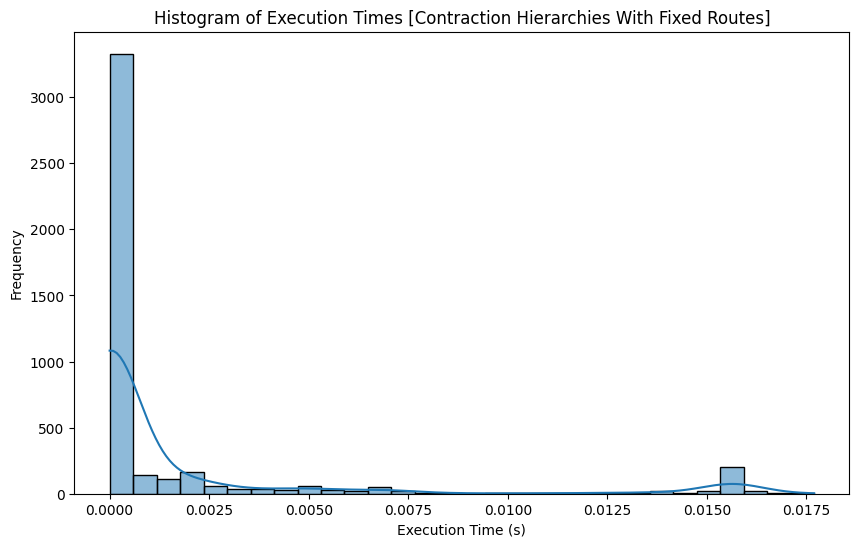

In [6]:
slowestTime = -1e9
fastestTime = 1e9
averageTime = 0

""" 
Generate a random source stop and calculate 
the shortest path to all other stops.

"""

timeExecution = []

all_stops = []
for stop in graph_fixed_CH.numVertices:
    all_stops.append(stop)
source = all_stops[random.randint(0, len(all_stops) - 1)]

print(f"From stop {source} to all stops.")

for x in tqdm(graph_fixed_CH.numVertices):
    startTime = time.time()
    totalTime, path = graph_fixed_CH.shortest_path_CH_fixed(source, x)
    endTime = time.time()
    executionTime = endTime - startTime
    averageTime += executionTime
    
    timeExecution.append(executionTime)
    
    if executionTime > slowestTime:
        slowestTime = executionTime
    if executionTime < fastestTime and executionTime > 0:
        fastestTime = executionTime

averageTime = averageTime / len(graph_fixed_CH.numVertices)
print("Fastest time:", fastestTime)
print("Slowest time:", slowestTime)
print("Average time:", averageTime)

plt.figure(figsize=(10, 6))
sns.histplot(timeExecution, bins=30, kde=True)
plt.title('Histogram of Execution Times [Contraction Hierarchies With Fixed Routes]')
plt.xlabel('Execution Time (s)')
plt.ylabel('Frequency')
plt.show()